# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The learning rate controls the step size of parameter updates in stochastic gradient descent and has a significant impact on convergence. A learning rate that is too small leads to slow convergence, while a large learning rate can cause instability and divergence. In SGD, where gradients are noisy, the learning rate also determines the magnitude of oscillations around the minimum. Common strategies include using a fixed learning rate, applying learning rate decay over time, and using adaptive methods such as Momentum, RMSProp, and Adam, which adjust the learning rate dynamically during training to improve convergence stability.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression


In [2]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[1], axis=1)


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [6]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
class LinearRegression_GD:
    def __init__(self, learning_rate=0.01, epochs=2000):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b

            dw = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2 / n_samples) * np.sum(y - y_pred)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


In [8]:
class LinearRegression_SGD:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                xi = X[i]
                yi = y[i]

                y_pred = np.dot(xi, self.w) + self.b

                dw = -2 * xi * (yi - y_pred)
                db = -2 * (yi - y_pred)

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


SGD updates n times per epoch
GD(0.01,2000)
SGD(0.01,50-100)

In [10]:
gd_model = LinearRegression_GD(learning_rate=0.01, epochs=2000)
gd_model.fit(X_train_scaled, y_train)
y_pred_gd = gd_model.predict(X_test_scaled)

sgd_model = LinearRegression_SGD(learning_rate=0.01, epochs=50)
sgd_model.fit(X_train_scaled, y_train.to_numpy())
y_pred_sgd = sgd_model.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)


In [12]:
print("Model Comparison:")
print("-" * 40)
print(f"Batch GD  -> MSE: {mse_gd:.3f}, R2: {r2_gd:.3f}")
print(f"SGD       -> MSE: {mse_sgd:.3f}, R2: {r2_sgd:.3f}")


Model Comparison:
----------------------------------------
Batch GD  -> MSE: 76.964, R2: 0.515
SGD       -> MSE: 96.606, R2: 0.391


In [14]:
for lr in [0.1, 0.01, 0.001]:
    sgd = LinearRegression_SGD(learning_rate=lr, epochs=100)
    sgd.fit(X_train_scaled, y_train.to_numpy())
    preds = sgd.predict(X_test_scaled)

    print(f"SGD (lr={lr}) -> MSE:",
          mean_squared_error(y_test, preds),
          "R2:", r2_score(y_test, preds))

SGD (lr=0.1) -> MSE: 456.68994379008234 R2: -1.879170012417636
SGD (lr=0.01) -> MSE: 97.35529206940988 R2: 0.3862303269693923
SGD (lr=0.001) -> MSE: 76.5965879505423 R2: 0.5171021344361368


Batch Gradient Descent achieved stable performance with an MSE of approximately 76.96 and an R² score of 0.515 due to the use of full-dataset gradients, resulting in smooth convergence. Stochastic Gradient Descent initially showed inferior performance because its parameter updates are based on noisy single-sample gradients. When the learning rate was too large (0.1), SGD diverged significantly, leading to very high error. However, by reducing the learning rate to 0.001, SGD achieved performance comparable to Batch GD, with similar MSE and R² values. This demonstrates that while SGD exhibits erratic update paths, appropriate learning rate selection allows it to converge effectively, making it preferable for large-scale datasets due to its computational efficiency

Batch Gradient Descent updates model parameters using gradients computed over the entire dataset, resulting in a smooth and stable convergence path. In contrast, Stochastic Gradient Descent updates parameters using a single training sample at a time, leading to noisy and erratic update paths. This noise arises due to high variance in gradient estimates. However, SGD is computationally efficient, scales well to very large datasets, and can escape shallow local minima, making it preferable in large-scale machine learning despite its unstable convergence behavior.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



a)
A Decision Tree is a supervised learning algorithm.
This is because it is trained on labeled data, where each data point has a known class label (or target value), and the tree learns decision rules based on these labels.

b)
Entropy is a measure of impurity or randomness in a dataset.
It tells us how mixed the class labels are at a node.

For binary classification, entropy is calculated as:

Entropy(S) = − p(+) * log2(p(+)) − p(−) * log2(p(−))

Entropy is 0 when all samples belong to one class and maximum when the classes are evenly distributed.

c)
Reduction in entropy (also called Information Gain) signifies how much uncertainty is reduced after splitting a node.

Information Gain = Entropy(parent) − weighted sum of entropies of child nodes

A higher reduction in entropy means a better split because the resulting child nodes are purer.

NUMERICAL ANSWERS

Total number of data points = 10
Number of positive samples = 5
Number of negative samples = 5

Entropy of the root node

p(+) = 5/10 = 0.5
p(−) = 5/10 = 0.5

Entropy(root) = −0.5 * log2(0.5) − 0.5 * log2(0.5)
Entropy(root) = 1.00

Entropy and Information Gain for each split

Split 1: x ≤ −2

Left node:
Samples = 1
Class distribution = (0 positive, 1 negative)
Entropy(left) = 0

Right node:
Samples = 9
Class distribution = (5 positive, 4 negative)
Entropy(right) ≈ 0.94

Weighted entropy = (1/10)*0 + (9/10)*0.94 = 0.85

Information Gain = 1.00 − 0.85 = 0.15

Split 2: x ≤ 2

Left node:
Samples = 9
Class distribution = (4 positive, 5 negative)
Entropy(left) ≈ 0.99

Right node:
Samples = 1
Class distribution = (1 positive, 0 negative)
Entropy(right) = 0

Weighted entropy = (9/10)*0.99 = 0.89

Information Gain = 1.00 − 0.89 = 0.11

Split 3: y ≤ 2

Left node:
Samples = 5
Class distribution = (4 positive, 1 negative)
Entropy(left) ≈ 0.72

Right node:
Samples = 5
Class distribution = (1 positive, 4 negative)
Entropy(right) ≈ 0.72

Weighted entropy = (5/10)*0.72 + (5/10)*0.72 = 0.72

Information Gain = 1.00 − 0.72 = 0.28

Best split

The split y ≤ 2 should be chosen because it gives the maximum reduction in entropy (Information Gain = 0.28).

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [17]:
iris = load_iris()
X = iris.data
y = iris.target


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [20]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

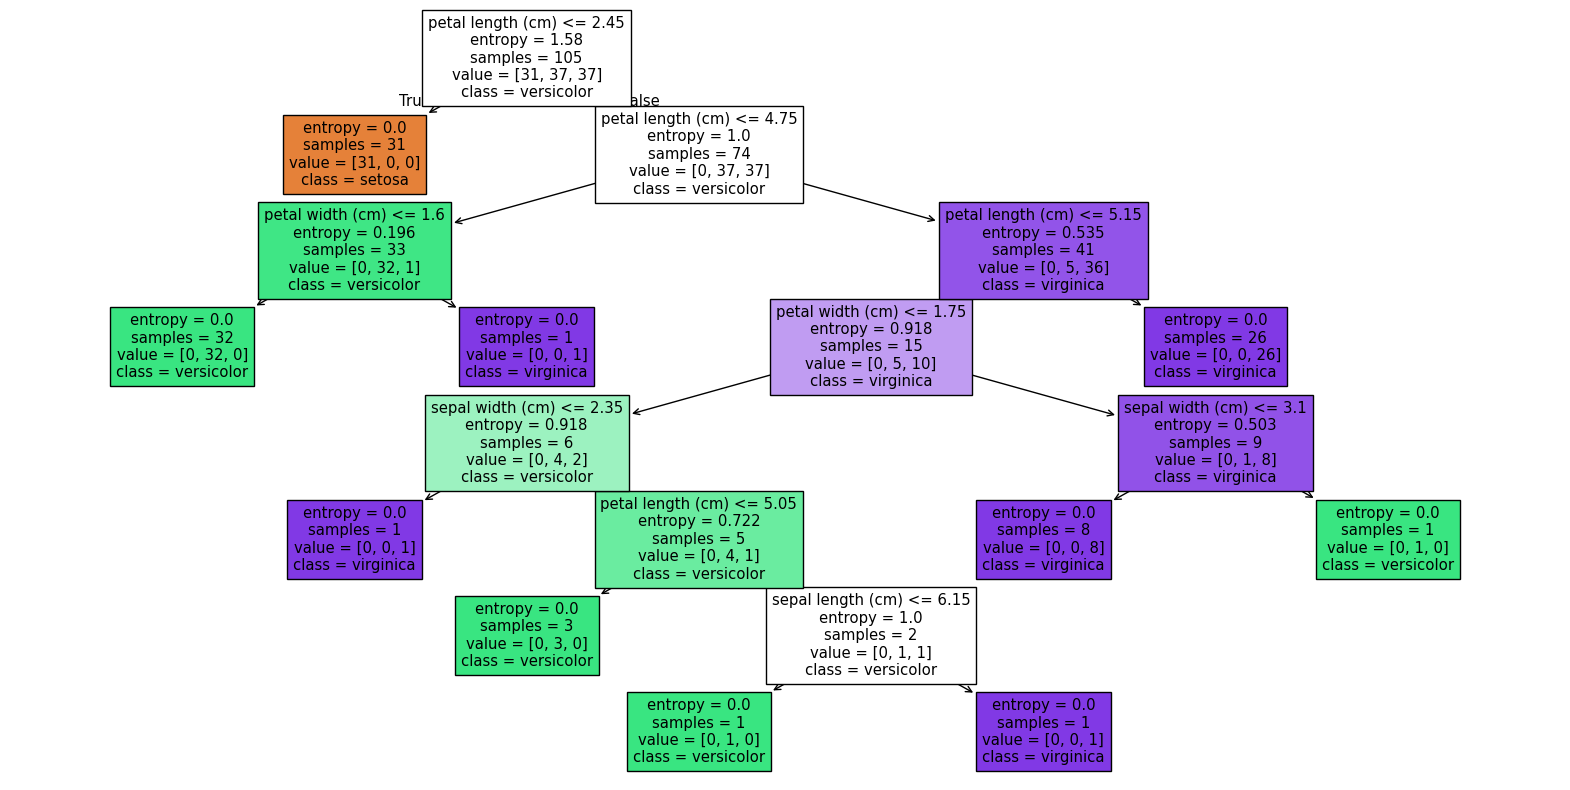

In [21]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()


# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



a)
A Support Vector Machine (SVM) is a supervised learning algorithm.
This is because it is trained using labeled data and learns a decision boundary that separates data points belonging to different known classes (in classification) or predicts continuous values (in regression).

b)
The margin in SVM is the distance between the decision boundary (hyperplane) and the nearest data points from each class.

SVM aims to maximize the margin because:

A larger margin leads to better generalization

It makes the model more robust to noise

It reduces the risk of overfitting

Maximizing the margin results in a more confident and stable decision boundary.

c)
Support vectors are the data points that lie closest to the decision boundary.

They are important because:

They completely determine the position of the decision boundary

Moving other data points does not affect the boundary as long as the support vectors remain unchanged

The margin is defined using only these points

Without support vectors, the SVM decision boundary cannot be defined.

d)
The purpose of a kernel function in SVM is to enable the algorithm to handle non-linearly separable data by mapping the data into a higher-dimensional feature space where a linear separation is possible.

Commonly used kernel functions include:

Linear kernel

Polynomial kernel

Radial Basis Function (RBF) kernel

Sigmoid kernel

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

a)
In a linearly separable dataset, SVM chooses the optimal separating hyperplane by selecting the hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class. Among all possible separating hyperplanes, SVM selects the one that provides the largest margin, as this leads to better generalization.

b)
When the data is not linearly separable, SVM allows misclassifications by introducing slack variables. This is known as a soft-margin SVM. Additionally, SVM can use kernel functions to transform the data into a higher-dimensional space where a linear separation becomes possible. This allows SVM to handle complex, non-linear decision boundaries.

c)
The regularization parameter C controls the trade-off between maximizing the margin and minimizing classification errors.

When C is very large:

The model strongly penalizes misclassification

The margin becomes smaller

The model tries to classify all training points correctly

Higher risk of overfitting

When C is very small:

The model allows more misclassifications

The margin becomes larger

The model is more tolerant to errors

Better generalization but possible underfitting